In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### モンテカルロ法による三角関数の積分
$I = \int^\pi_0 dx \, \sin(x) = \frac{1}{\pi}\int^\pi_0 dx \, \pi \sin(x)$

In [2]:
# モンテカルロ積分を実行する関数
def integrate_sin(N):
  sum = 0.0
  for _ in range(N):
    x = np.pi*random.random() # [0,pi]の間の乱数を生成
    sum += np.sin(x) * np.pi     # pi*sin(x)を足す。
  return sum / N

In [3]:
int_arr = []
N_arr = []
for i in range(9):
  N_arr.append(10**i)
  int_arr.append(integrate_sin(10**i))

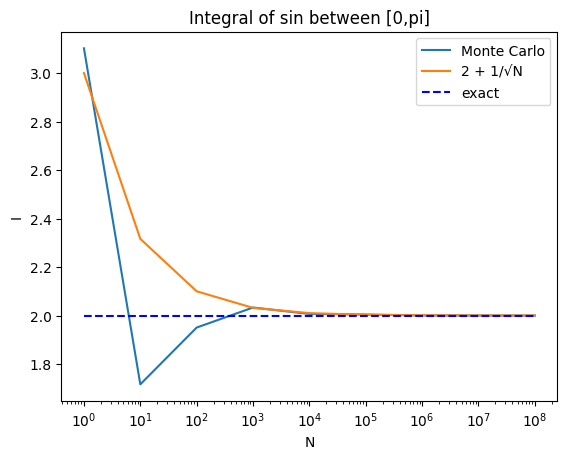

In [4]:
err = 1/np.sqrt(N_arr)
plt.plot(N_arr, int_arr, label="Monte Carlo")
plt.plot(N_arr, err + 2, label="2 + 1/√N")
plt.hlines([2], N_arr[0], N_arr[-1], "blue", linestyles='dashed', label = "exact")
plt.xlabel("N")
plt.ylabel("I")
plt.title("Integral of sin between [0,pi]")
plt.xscale('log')
plt.legend()
plt.show()

### 円の面積
$ \lim_{N\rightarrow\infty} \frac{K}{N} = \frac{\pi}{4}$ ただし、$K$は条件を満たす点の個数

In [5]:
N = 1000
inside_x = []
inside_y = []
outside_x = []
outside_y = []
for _ in range(N):
  x = random.random()
  y = random.random()
  if x**2 + y**2 <= 1:
    inside_x.append(x)
    inside_y.append(y)
  else:
    outside_x.append(x)
    outside_y.append(y)

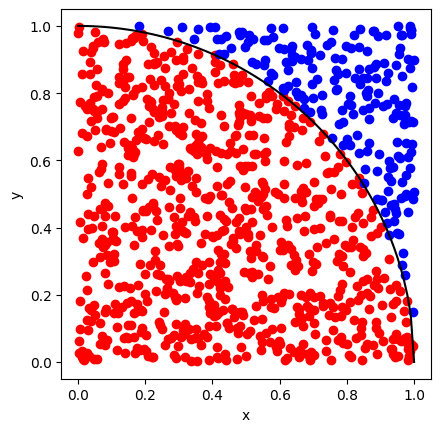

In [6]:
x_arr = [i/100 for i in range(101)]
y_arr = [np.sqrt(1-ix**2) for ix in x_arr]
plot = plt.subplot()
plot.plot(x_arr, y_arr, c = 'black')
plot.scatter(inside_x, inside_y, c='red')
plot.scatter(outside_x, outside_y, c='blue')
plot.set_xlabel('x')
plot.set_ylabel('y')
plot.set_aspect('equal')

In [7]:
# 第一象限の円の面積を求める関数
def estimate_pi(N):
  count = 0
  for _ in range(N):
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1: # 円の内部ならcountを加算する。
      count += 1
  return count / N

In [8]:
pi_arr = []
N_arr = []
for i in range(9):
  N_arr.append(10**i)
  pi_arr.append(estimate_pi(10**i))

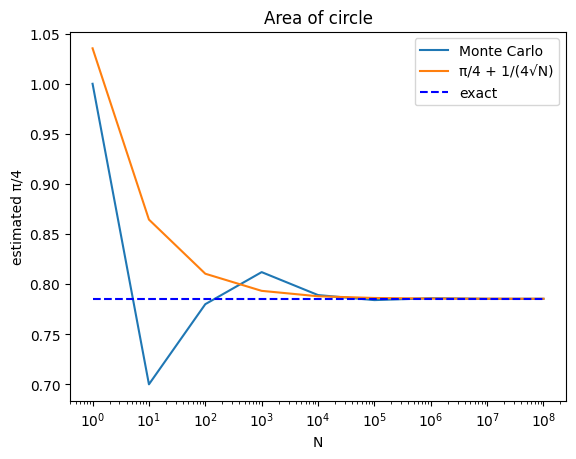

In [9]:
err = 1/np.sqrt(N_arr)
plt.plot(N_arr, pi_arr, label="Monte Carlo")
plt.plot(N_arr, 0.25*err + np.pi/4, label="π/4 + 1/(4√N)")
plt.hlines([np.pi/4], N_arr[0], N_arr[-1], "blue", linestyles='dashed', label = "exact")
plt.xlabel("N")
plt.ylabel("estimated π/4")
plt.title("Area of circle")
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

### メトロポリス法による確率分布の再現
$ S(x) = \frac{x^2}{2}$

In [10]:
# 作用を返す関数
def action(x):
  return 0.5*x**2

# メトロポリス法を行い、xの履歴を返す関数。x_initはxの初期値
def metropolis(N, x_init):
  x = x_init
  x_arr = [x_init]
  for _ in range(N):
     x_prime = x + random.uniform(-1.0, 1.0)     # 次のxの提案
     prop = np.exp(action(x) - action(x_prime)) # 遷移確率。確率が1を超えることを許容している。
     if random.random() < prop:                           # 0から1の間の乱数より遷移確率が大きければ、提案を採用
       x = x_prime
     x_arr.append(x)

  return x_arr

In [11]:
g_10to2 = metropolis(10**2, 0.)
g_10to3 = metropolis(10**3, 0.)
g_10to6 = metropolis(10**6, 0.)

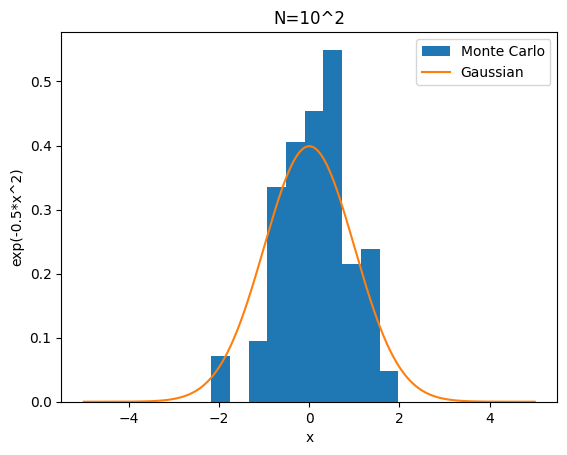

In [12]:
x = np.linspace(-5,5,1000)
y = np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(g_10to2, bins=10, density=True, label = "Monte Carlo")
ax.plot(x,y, label = "Gaussian")
ax.set_title("N=10^2")
ax.set_xlabel('x')
ax.set_ylabel('exp(-0.5*x^2)')
ax.legend()

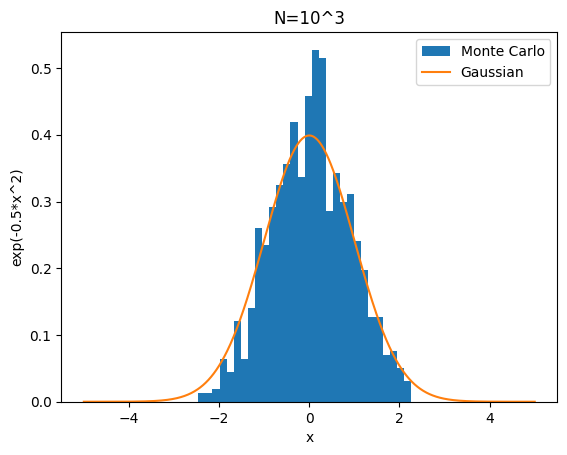

In [13]:
x = np.linspace(-5,5,1000)
y = np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(g_10to3, bins=30, density=True, label = "Monte Carlo")
ax.plot(x,y, label = "Gaussian")
ax.set_title("N=10^3")
ax.set_xlabel('x')
ax.set_ylabel('exp(-0.5*x^2)')
ax.legend()

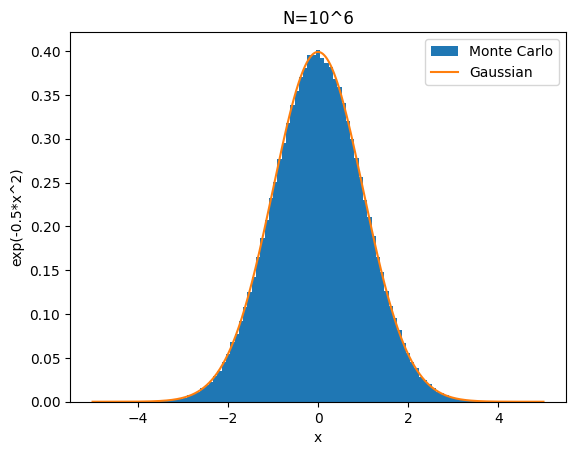

In [14]:
x = np.linspace(-5,5,1000)
y = np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(g_10to6, bins=100, density=True, label = "Monte Carlo")
ax.plot(x,y, label = "Gaussian")
ax.set_title("N=10^6")
ax.set_xlabel('x')
ax.set_ylabel('exp(-0.5*x^2)')
ax.legend()